In [2]:
!pip install mapclassify

In [3]:
import geopandas as gpd

In [5]:
blood_lead_shp = r'child_blood_lead_levels_by_ct.shp'
blood_lead_gdf = gpd.read_file(blood_lead_shp)

city_bound = gpd.read_file('City_Limits.shp')
# print the first 5 records of the dataframe, used to check the data structure
blood_lead_gdf.head()

,census_tra,data_redac,num_bll_5p,num_screen,perc_5plus,geometry
0,42101000100,0,0.0,100.0,0.0,"POLYGON ((-75.14147 39.95171, -75.14150 39.951..."
1,42101000200,1,NaN,109.0,NaN,"POLYGON ((-75.16238 39.95765, -75.16236 39.957..."
2,42101000300,1,NaN,110.0,NaN,"POLYGON ((-75.17820 39.95981, -75.17743 39.959..."
3,42101000401,1,NaN,61.0,NaN,"POLYGON ((-75.17299 39.95464, -75.17301 39.954..."
4,42101000402,0,0.0,41.0,0.0,"POLYGON ((-75.16333 39.95334, -75.16340 39.953..."


In [32]:
print(blood_lead_gdf['num_bll_5p'].max()) # print the min value of the blood lead records for each neighborhood
print('The max value is:', blood_lead_gdf['num_bll_5p'].max()) # print the max value
print('The mean value is:', blood_lead_gdf['num_bll_5p'].mean()) #print the mean value of all neighborhoods
print(blood_lead_gdf['num_bll_5p'].describe()) # a general discription of the blood lead for all neighborhoods

81.0
The max value is: 81.0
The mean value is: 17.62948207171315
count    251.000000
mean      17.629482
std       14.603362
min        0.000000
25%        7.000000
50%       14.000000
75%       26.000000
max       81.000000
Name: num_bll_5p, dtype: float64


In [18]:
!pip install matplotlib-scalebar

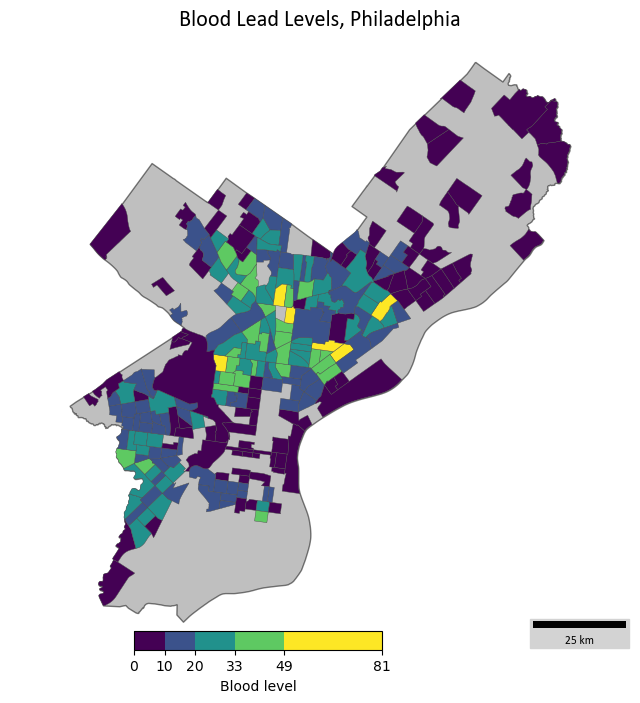

In [85]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import Normalize
from matplotlib import cm
import mapclassify as mc
from matplotlib_scalebar.scalebar import ScaleBar


# create a empty plot for the choropleth map
fig, ax = plt.subplots(1, figsize=(8, 8))

# the number of categories
n_class = 5

# get the color bar, the string for color can be found here, https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html
cmap = plt.cm.get_cmap('viridis', n_class)

# plot the city limit as the background
city_bound_phily.plot(ax=ax, alpha=0.5, color='grey', edgecolor='k')

# the field to plot the choropleth map
field = 'num_bll_5p'

# plot the choropleth map of blood lead in Philadelphia
blood_lead_gdf_phily.plot(column=field, 
                     cmap='viridis', 
                     edgecolor='0.3', 
                     ax = ax,
                     linewidth=0.3,
                     k=n_class, #the number of classes
                     scheme='NaturalBreaks') # 'equal_interval', 'quantiles', 'FisherJenks', 'NaturalBreaks'


# the function should be matched with the scheme of the above geopandas plot, https://pysal.org/mapclassify/_modules/mapclassify/classifiers.html
nb = mc.NaturalBreaks(blood_lead_gdf[field].dropna(), k=n_class) # NaturalBreaks, FisherJenks, quantile
vals = list(nb.bins) #get the interval labels
vals.insert(0, blood_lead_gdf[field].min())


# set the location of the legend
axins = ax.inset_axes([0.2, 0, 0.4, 0.03]) #left, bottom, width, height

# # create a color bar for the map
norm = mpl.colors.BoundaryNorm(vals, cmap.N) 
n_cmap = cm.ScalarMappable(norm=norm, cmap=cmap)
cbar = ax.get_figure().colorbar(n_cmap, 
                                orientation='horizontal', 
                                cax=axins,
                                spacing='proportional',  
                                fraction=0.046, 
                                pad=0.0, 
                                ticks=vals,
                                shrink=0.4)

cbar.ax.set_xlabel('Blood level')



scale = ScaleBar(
    dx=1.5,  
    location='lower right',
    font_properties={'family':'calibri', 'size': 'small'},
     color='black',
    box_color='lightgray'
)


ax.add_artist(scale)


ax.set_axis_off()
plt.axis('equal')

ax.set_title('Blood Lead Levels, Philadelphia', fontsize='16', fontname='calibri')
## plt.savefig("PhiladelphiaBloodLead.png", bbox_inches='tight', pad_inches=0.1, dpi=200)
plt.show()


OSError: [Errno 22] Invalid argument: 'PhiladelphiaBloodLead.png'